# Assignment 1 Winter 2023 


--> The following dataset is a sample that contains patients’ information (demographics 
and medical data) that relates to heart disease prediction. The features are: 
 Age: age of the patient [years] 
 
  Sex: sex of the patient [M: Male, F: Female]
  
  ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal 
Pain, ASY: Asymptomatic] 

 RestingBP: resting blood pressure [mm Hg] 
 
 Cholesterol: serum cholesterol [mm/dl] 
 
 FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 
 
 RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality 
(T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or 
definite left ventricular hypertrophy by Estes' criteria] 

 MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 
 
 ExerciseAngina: exercise-induced angina [Y: Yes, N: No] 
 
 Oldpeak: oldpeak = ST [Numeric value measured in depression] 
 
 ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 
 HeartDisease: output class [1: heart disease, 0: Normal] 
 
 
As a data analyst, you are tasked to answer the following questions to obtain insights about the 
data and to conduct predictive modeling to forecast the presence of heart failure (variable 
HeartDisease). 


In [138]:
# First import the libraries you'll need
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder     #importing label encoder for label encoding of categorical data with more than 2 categories.


import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [139]:
# import the dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 1. Exploratory data analysis (20 points)

## a) Get a description, general information, data types, and shape of the dataset.

In [140]:
df.describe()      # Statistical description

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [141]:
df.info()            # General information of null values in  dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [142]:
df.dtypes             # To know the types of the sataset

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [143]:
# To know the shape of dataset
print('shape of dataset:',df.shape)
print('Dimension of the dataset:', df.ndim)
print('size of the dataset:', df.size)

shape of dataset: (918, 12)
Dimension of the dataset: 2
size of the dataset: 11016


## b)Determine the frequency of distinct values for each feature in the dataset. 

In [144]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [145]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [146]:

##'Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Oldpeak','ST_Slope','HeartDisease'
col=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']

for x in col:
    
    print(x,':',df[x].unique())


Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 2

In [147]:
df.columns      # print all given features from dataset
#get the frequency count of distict values for this feature by for loop
for x in df.columns:
    value_counts=df[x].value_counts()   # Get the value for unique record by value count/frequency of it
    print(f'{x} value_counts:  ')       # print the column name and value count
    print(value_counts)                 

Age value_counts:  
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
Sex value_counts:  
M    725
F    193
Name: Sex, dtype: int64
ChestPainType value_counts:  
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingBP value_counts:  
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
Cholesterol value_counts:  
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      

## C.) Plot all features in the dataset to check distribution using a histogram

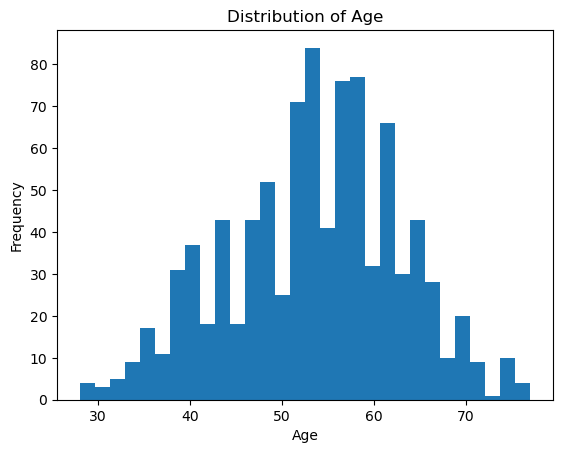

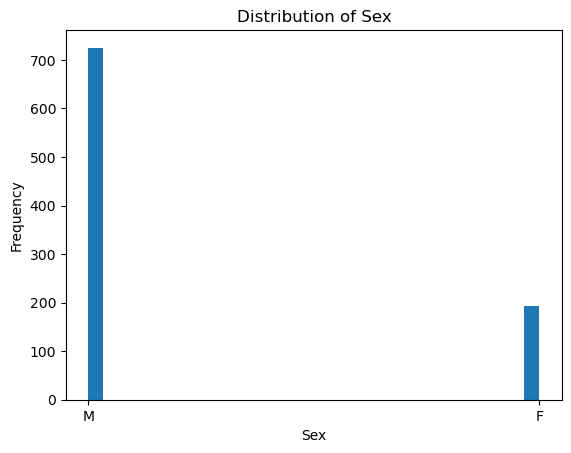

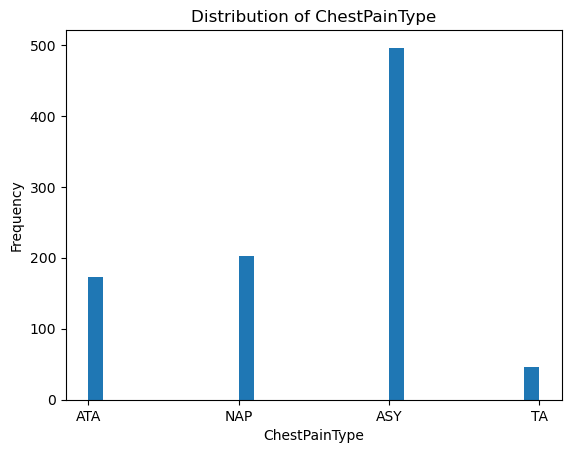

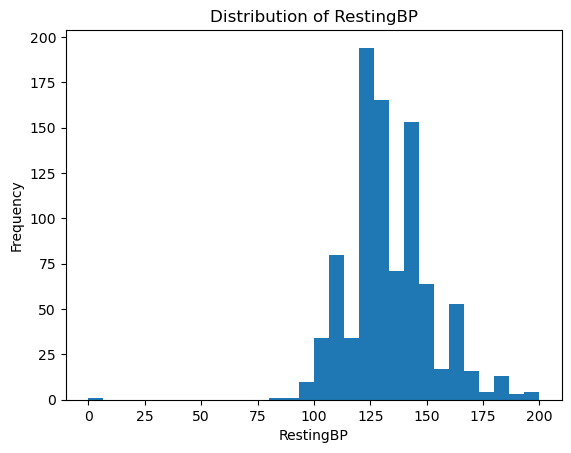

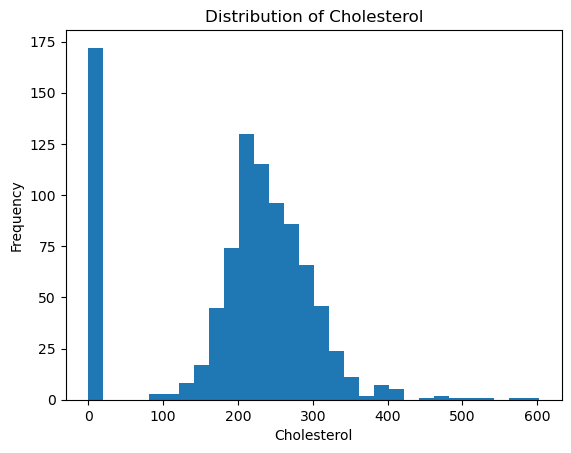

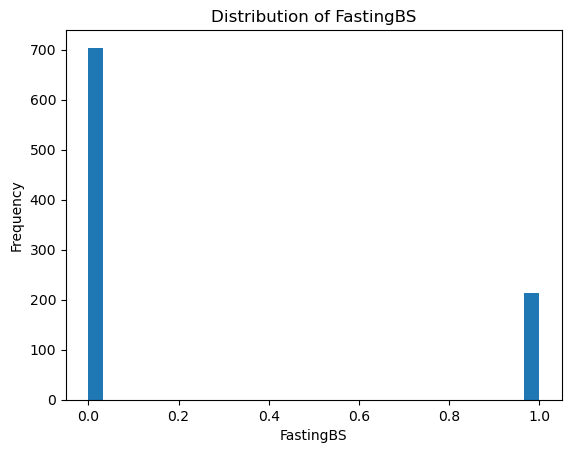

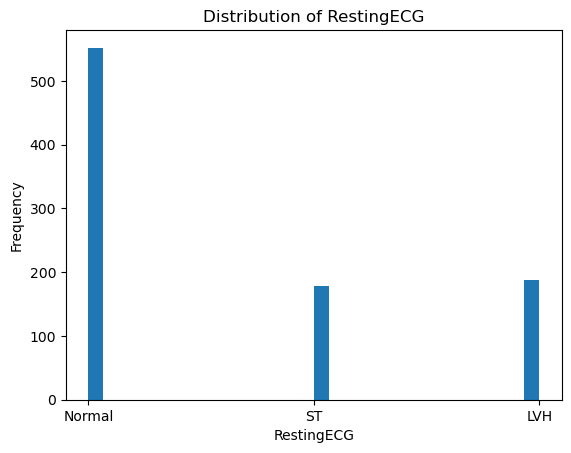

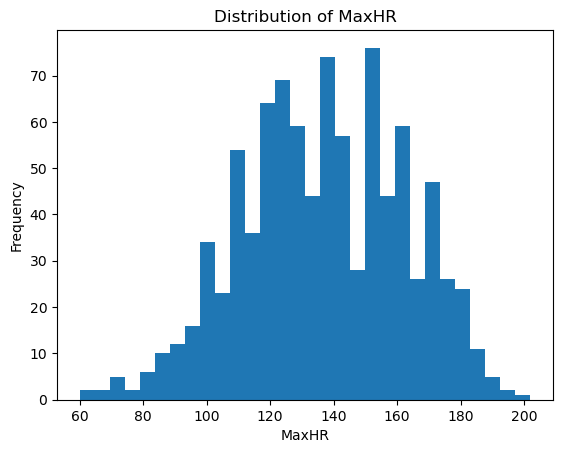

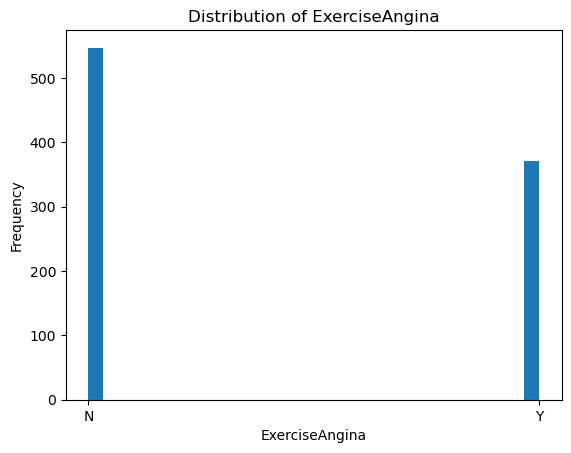

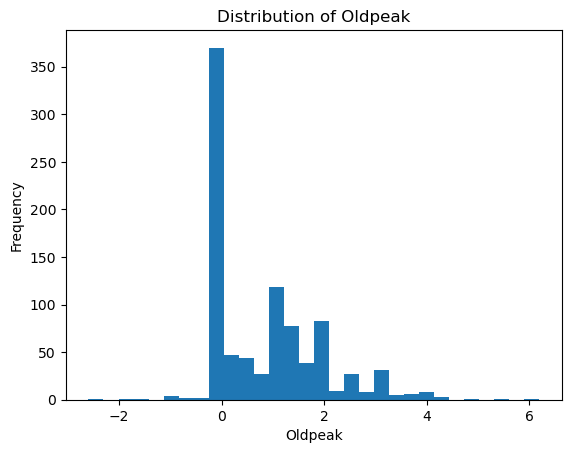

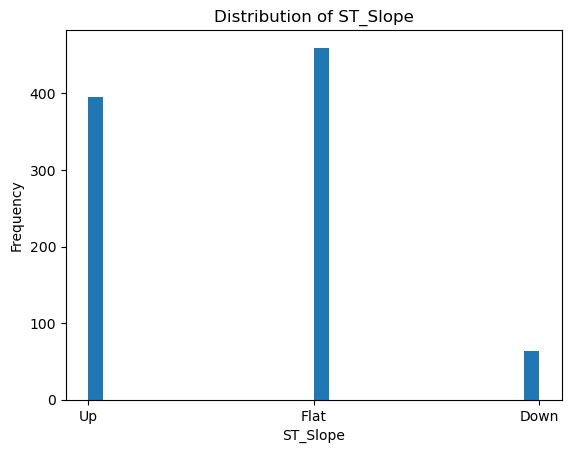

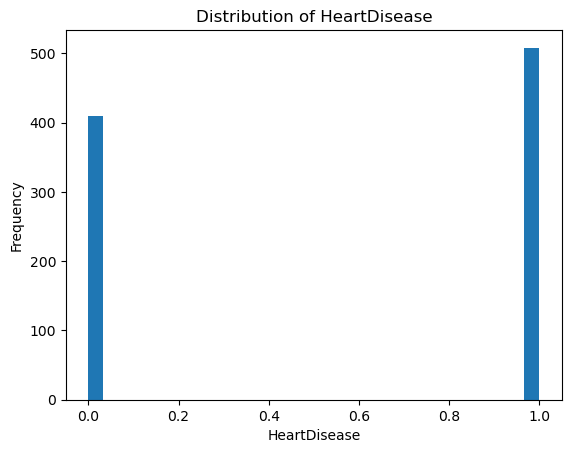

In [148]:
# frequancy destribution of each variable
for col in df.columns:
    plt.hist(df[col],bins=30) ##adjust bins as needed
    plt.title(f"Distribution of {col}")   # add the graph title and axes labels
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()  # display the plot        



## d) Use a correlation matrix to check for correlation between predictor variables and drop correlated features (> 0.5).

In [149]:
# Use a correlation matrix to check for correlation between predictor variables and drop correlated features (> 0.5).
corr_matrix=df.corr()
corr_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [150]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Find features with correlation greater than 0.5 and fit it in 'to_drop'
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]


# Drop the correlated features from the DataFrame whihc have correlation>0.5
df = df.drop(to_drop, axis=1)


<AxesSubplot:>

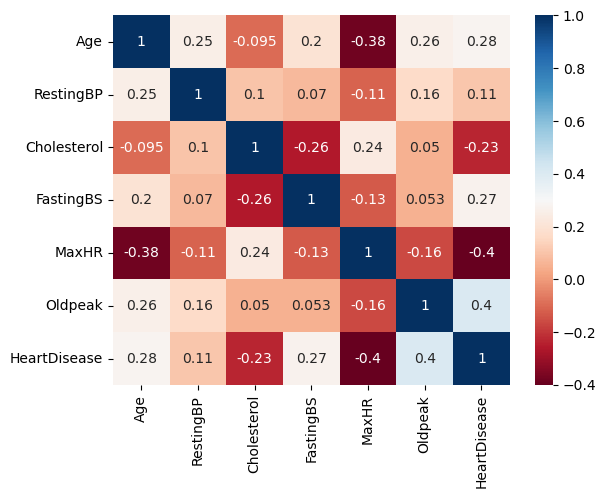

In [151]:
# Calculate correlations between numeric features
# Plot heatmap of correlations
sns.heatmap(df.corr(), cmap="RdBu", annot=True)

# 2. Feature Engineering (20 points) 

## a) Check and drop duplicate and missing values, if it’s the case.

In [152]:
# check the duplicate value
d_value=df.duplicated().sum() 
print('NO. of duplicate rows:'==d_value)

False


we do not have any missing value

In [153]:
#check missing values:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## b) Check and manage imbalance class, if needed.


In [154]:
# checking the imbalance class for feature by using for loop  with value counts :
feature= ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

for x in feature:
    value_counts=df[x].value_counts()
    print(f'{x} value counts:')
    print(value_counts)



Sex value counts:
M    725
F    193
Name: Sex, dtype: int64
ChestPainType value counts:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG value counts:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ExerciseAngina value counts:
N    547
Y    371
Name: ExerciseAngina, dtype: int64
ST_Slope value counts:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
HeartDisease value counts:
1    508
0    410
Name: HeartDisease, dtype: int64


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

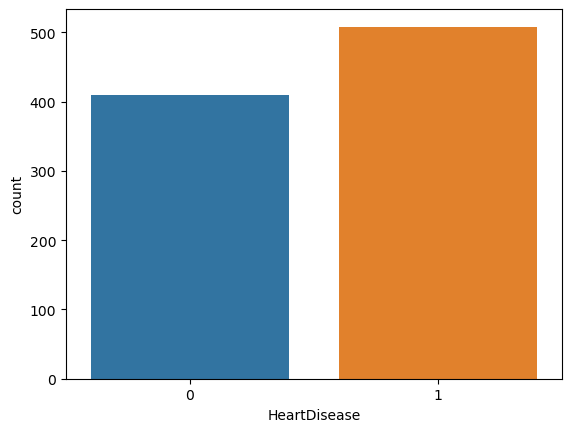

In [155]:
# Check imbalance class for target variable:
sns.countplot(df.HeartDisease)

## c) Check (Use boxplots) and take care of outliers (e.g. Cholesterol, Oldpeak) by completing imputation. 

In [156]:
# Creating different dataframes for numerical and catagorical data

category=df[['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']]
numerical=df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]

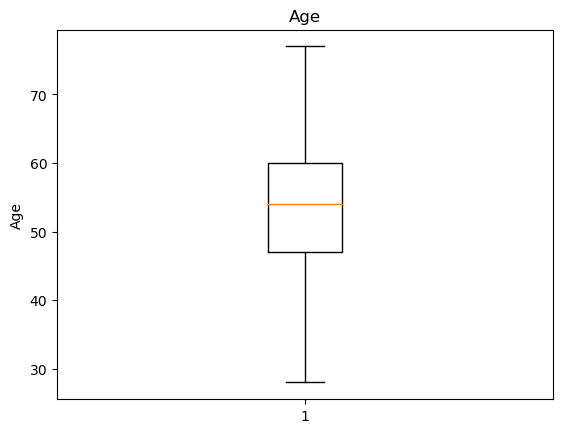

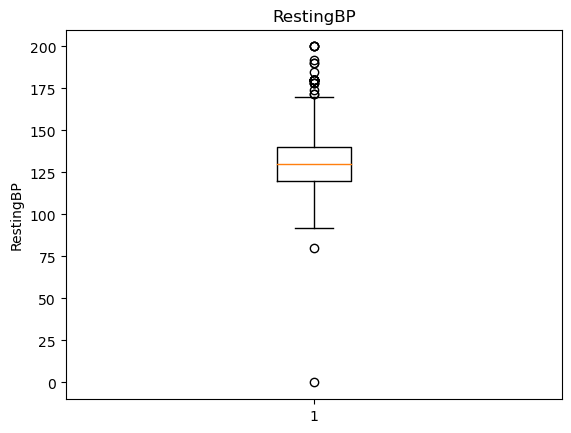

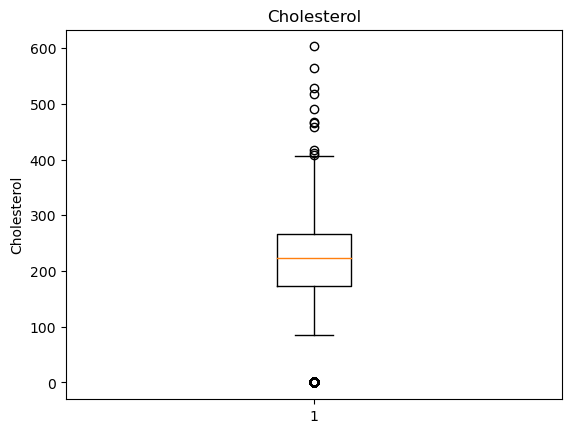

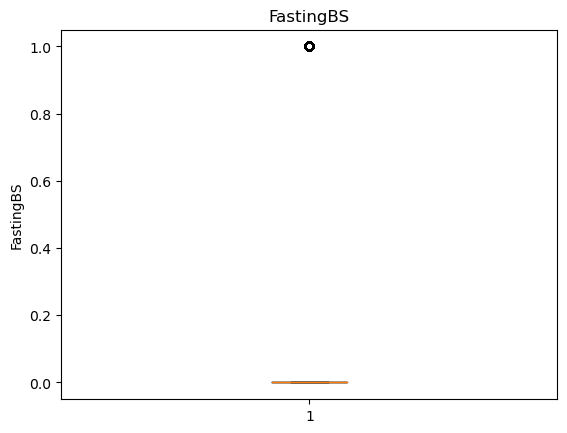

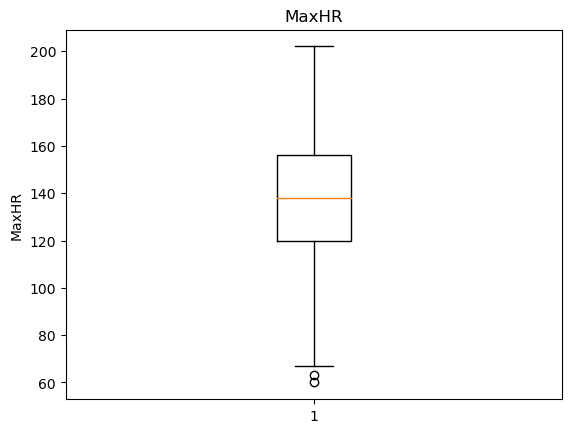

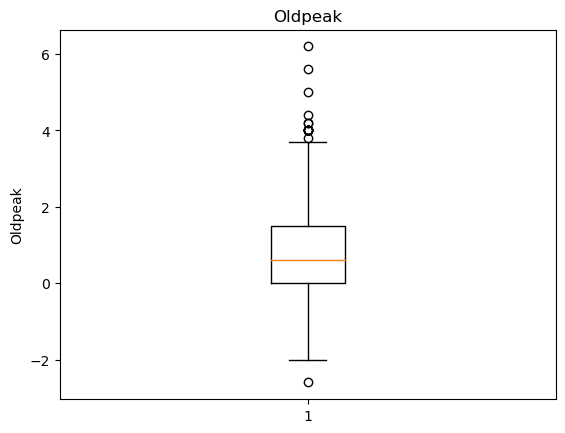

In [157]:
# Box plot only for Numeric features:
for x in numerical:
    plt.boxplot(df[x])
    plt.title(x)
    plt.ylabel(x)
    plt.show()

Text(0.5, 1.0, 'Outliers')

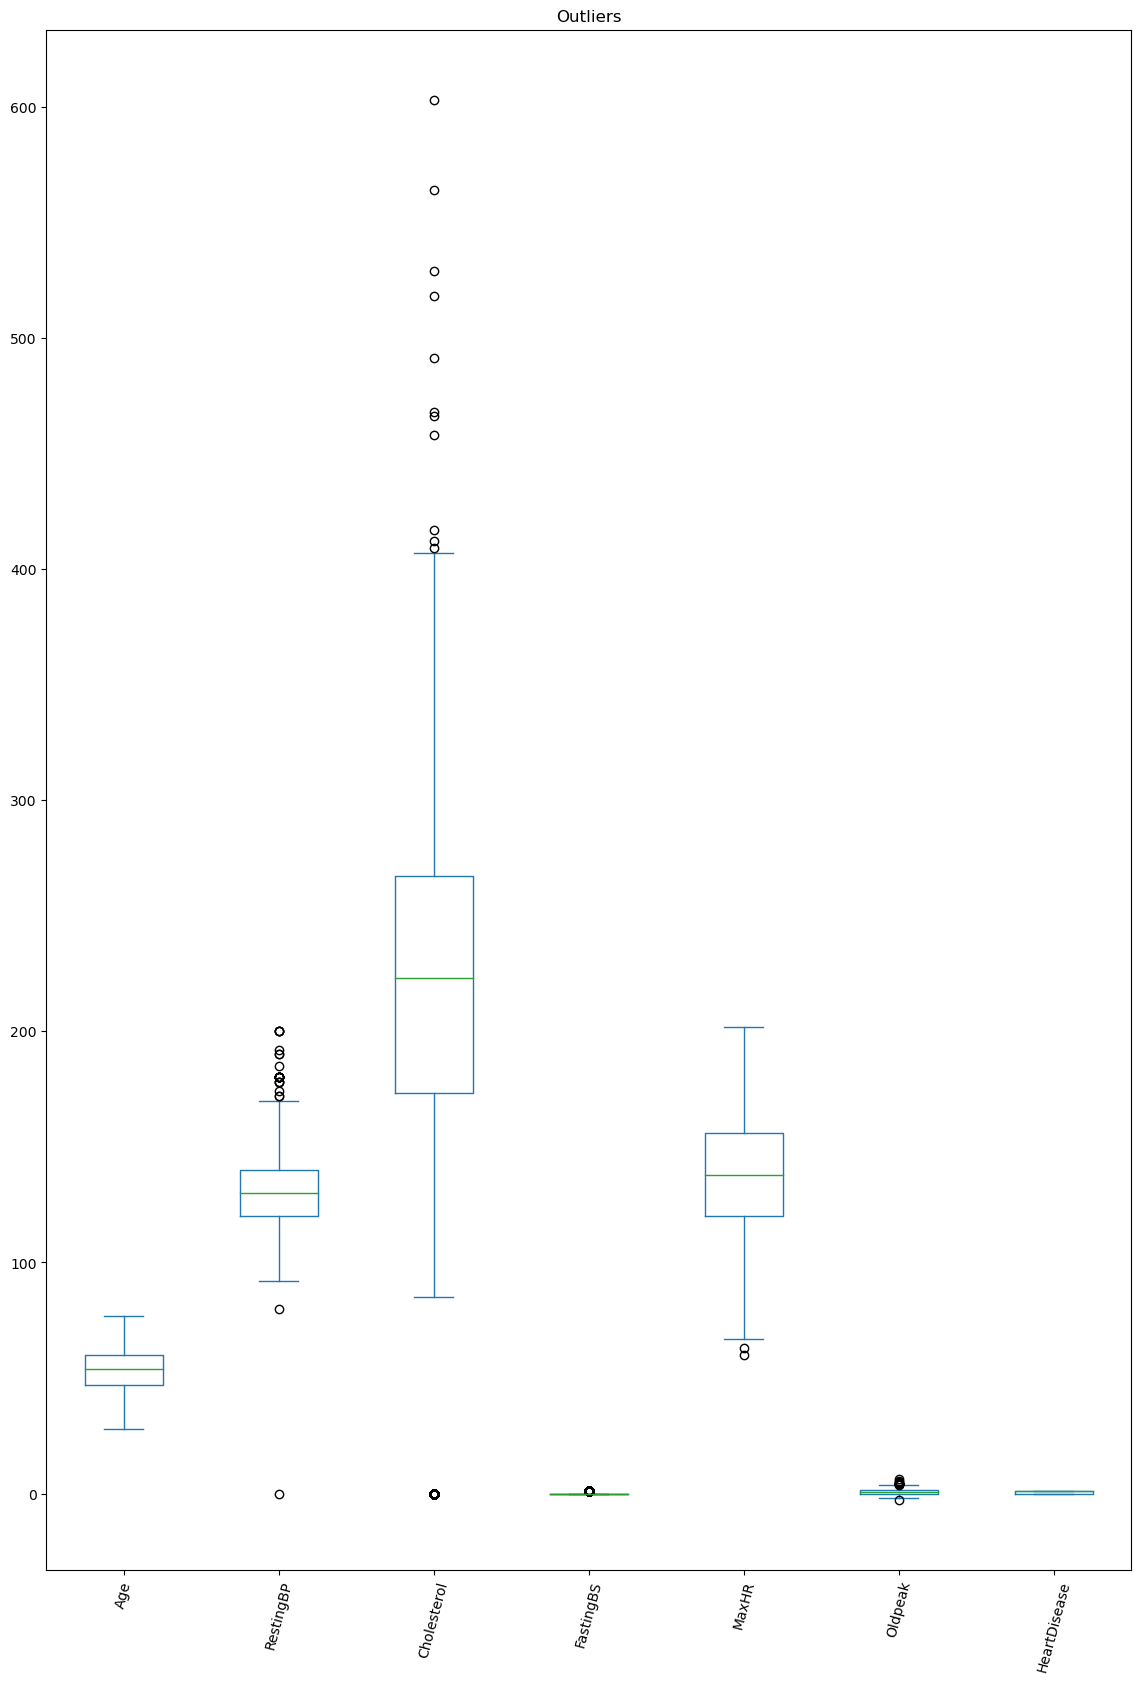

In [158]:
# ALL Outliers in one chart

df.plot(kind='box',figsize=(14,20))
plt.xticks(rotation=75)
plt.title('Outliers')

In [159]:
# Outliers for RestingBP based on inter quartile range 
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['RestingBP'] < (Q1 - 1.5 * IQR)) | (df['RestingBP'] > (Q3 + 1.5 * IQR)))

In [160]:
#Imputation with median
median = df['RestingBP'].median()
print(median)

130.0


In [161]:
df.loc[outliers,'RestingBP']=median            # use of loc to access multiple column   

In [162]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,15.597206,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [163]:
# Impute colestrole value with median
df['Cholesterol'].replace(0, df['Cholesterol'].median(),inplace=True)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,240.581699,0.233115,136.809368,0.887364,0.553377
std,9.432617,15.597206,53.982967,0.423046,25.460334,1.066570,0.497414
min,28.000000,92.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [164]:
## Outliers for Cholesterol based on inter quartile range 
Q1 = df["Cholesterol"].quantile(0.25)
Q3 = df["Cholesterol"].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df["Cholesterol"] < (Q1 - 1.5 * IQR)) | (df["Cholesterol"] > (Q3 + 1.5 * IQR)))

In [165]:
median = df["Cholesterol"].median()
print(median)

223.0


In [166]:
df.loc[outliers,"Cholesterol"]=median

In [167]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,235.859477,0.233115,136.809368,0.887364,0.553377
std,9.432617,15.597206,39.708080,0.423046,25.460334,1.066570,0.497414
min,28.000000,92.000000,139.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,216.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,260.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,344.000000,1.000000,202.000000,6.200000,1.000000


In [168]:
df.loc[outliers,"Cholesterol"]=median

In [169]:
df.describe()                             #to check the change after imputatiion

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,235.859477,0.233115,136.809368,0.887364,0.553377
std,9.432617,15.597206,39.708080,0.423046,25.460334,1.066570,0.497414
min,28.000000,92.000000,139.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,216.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,260.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,344.000000,1.000000,202.000000,6.200000,1.000000


In [170]:
#Take care of outliers fro fastingBS
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

Text(0.5, 1.0, 'Outliers')

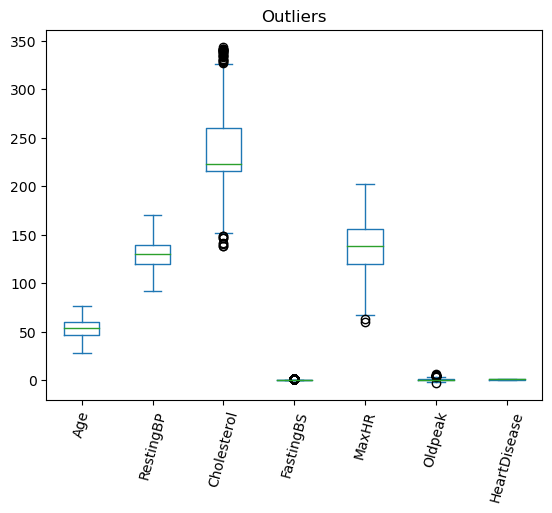

In [171]:
df.plot(kind='box')
plt.xticks(rotation=75)
plt.title('Outliers')

In [172]:
df.head()                             #Transformation of data after imputation of outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Text(0.5, 1.0, 'Outliers')

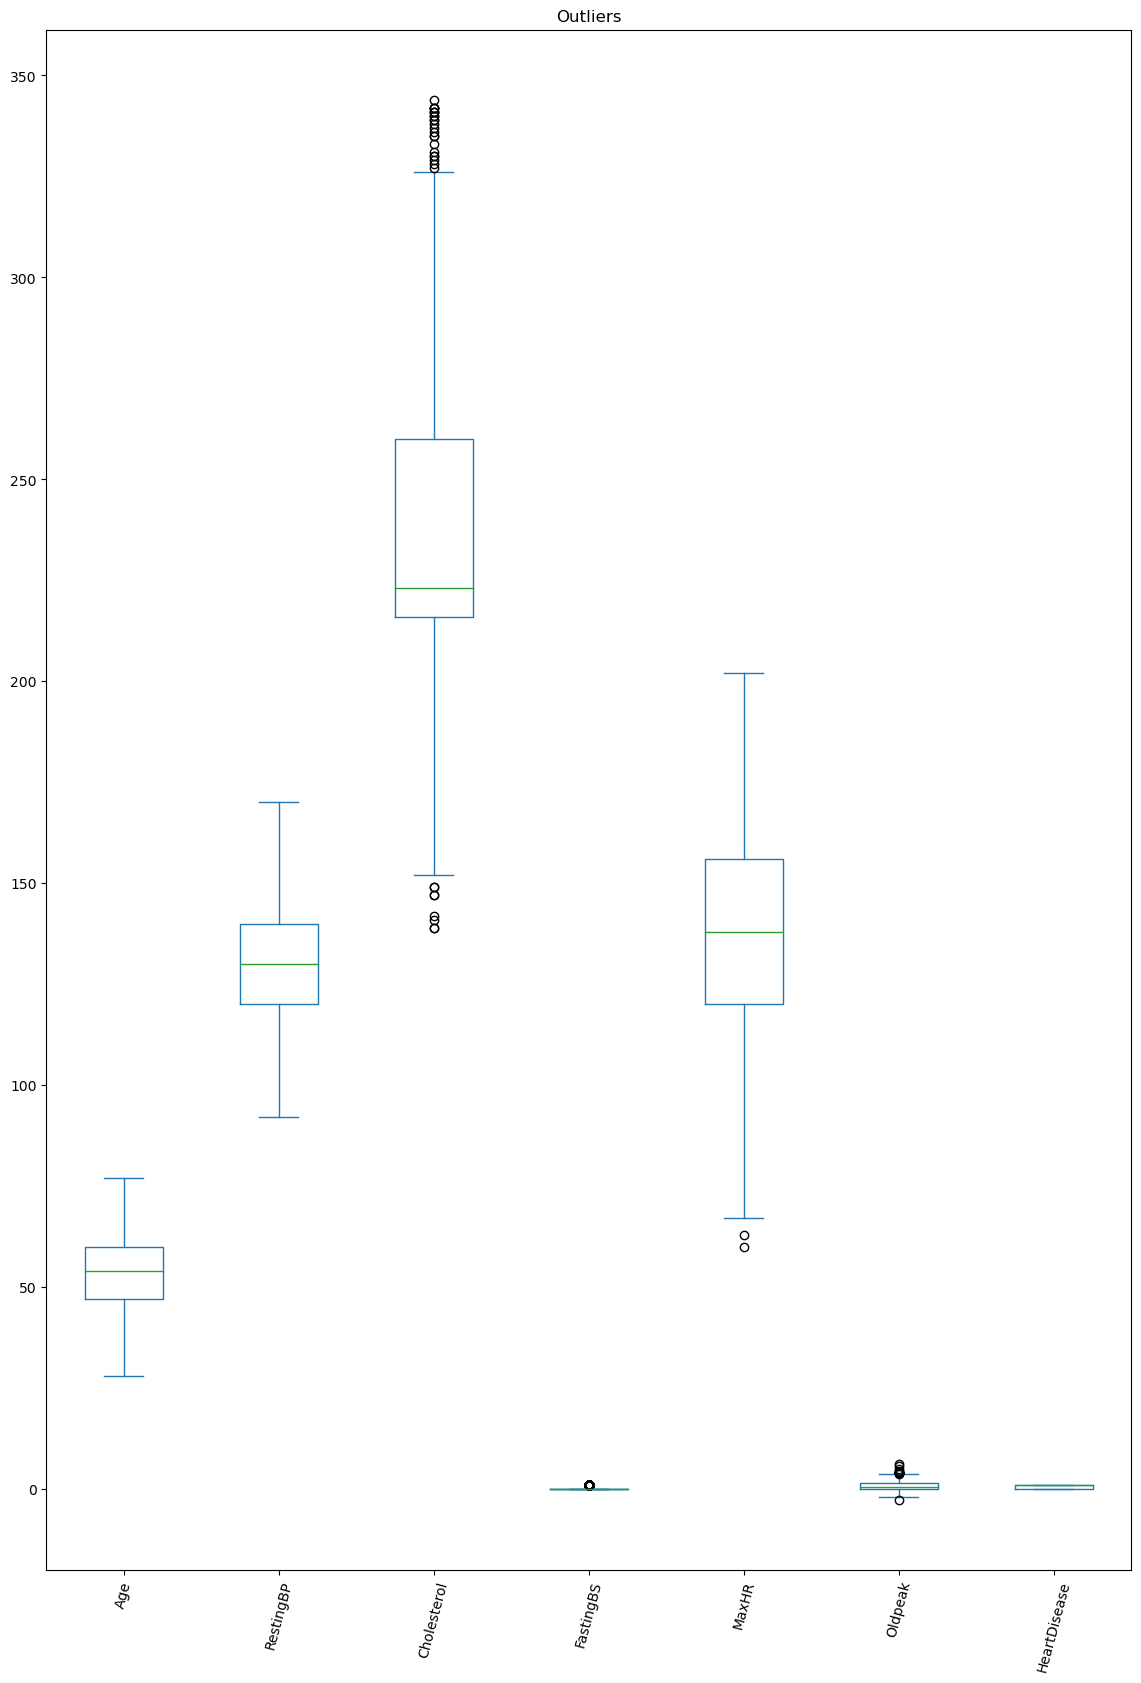

In [173]:
# After imputation representation of all numerical values of outliers
df.plot(kind='box',figsize=(14,20))
plt.xticks(rotation=75)
plt.title('Outliers')

## d.) Convert categorical data into numerical data into numerical daat using one-hot encoding or any other label encoding approach



In [174]:
category.head()             #Check number of catagorical column in dataset

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [175]:
# one-hot encoding  convert the sex column to binary variables
df_onehot=pd.get_dummies(df["Sex"], prefix="Sex")

df=pd.concat([df, df_onehot],axis=1)    # Add the new binary variables to the original dataframe
df.drop(columns='Sex', inplace=True)
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [176]:
#Remove one column from sex because it is binary and we can define it by using 1 column.
df.drop(columns='Sex_F', inplace=True)
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [177]:
# one-hot encoding  convert the  Chestpaintype column to binary variables:
le=LabelEncoder()

# Assigning label encoded feature and dropping original feature (ChestPainType)

df["ChestPainType_LE"] = le.fit_transform(df["ChestPainType"])
df.drop(columns='ChestPainType', inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_LE
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,2
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,2


In [178]:
print("Categories and Encoded Values: ")
for i, category in enumerate(le.classes_):
    print(category, ":", i)

Categories and Encoded Values: 
ASY : 0
ATA : 1
NAP : 2
TA : 3


In [179]:
# Assigning label encoded feature and dropping original feature (RestingECG)

df["RestingECG_LE"] = le.fit_transform(df["RestingECG"])
df.drop(columns='RestingECG', inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_LE,RestingECG_LE
0,40,140,289,0,172,N,0.0,Up,0,1,1,1
1,49,160,180,0,156,N,1.0,Flat,1,0,2,1
2,37,130,283,0,98,N,0.0,Up,0,1,1,2
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,1
4,54,150,195,0,122,N,0.0,Up,0,1,2,1


In [180]:
# Print the original categories of label encoded feature and their encoded values (RestingECG)

print("Categories and Encoded Values: ")
for i, category in enumerate(le.classes_):
    print(category, ":", i)

Categories and Encoded Values: 
LVH : 0
Normal : 1
ST : 2


In [181]:
# use ont-hot encoding to convert the ExerciseAngina column to binary variables

df_onehot=pd.get_dummies(df["ExerciseAngina"], prefix="ExerciseAngina")
df_onehot.head()


,ExerciseAngina_N,ExerciseAngina_Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [182]:
# Add the new binary variables to the original dataframe
df = pd.concat([df, df_onehot], axis=1)
df.drop(columns='ExerciseAngina_N', inplace=True)



In [183]:
df.drop(columns='ExerciseAngina', inplace=True)   # it is binary variable so we can define it by one column
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_LE,RestingECG_LE,ExerciseAngina_Y
0,40,140,289,0,172,0.0,Up,0,1,1,1,0
1,49,160,180,0,156,1.0,Flat,1,0,2,1,0
2,37,130,283,0,98,0.0,Up,0,1,1,2,0
3,48,138,214,0,108,1.5,Flat,1,0,0,1,1
4,54,150,195,0,122,0.0,Up,0,1,2,1,0


In [184]:
# Assigning label encoded feature and dropping original feature (ST_Slope)

df["ST_Slope_LE"] = le.fit_transform(df["ST_Slope"])
df.drop(columns='ST_Slope', inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_LE,RestingECG_LE,ExerciseAngina_Y,ST_Slope_LE
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2


In [185]:
# Print the original categories of label encoded feature and their encoded values (ST_Slope)

print("Categories and Encoded Values: ")
for i, category in enumerate(le.classes_):
    print(category, ":", i)

Categories and Encoded Values: 
Down : 0
Flat : 1
Up : 2


In [186]:
df.head()                     #Dataset after changing all values in numerical formet

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_LE,RestingECG_LE,ExerciseAngina_Y,ST_Slope_LE
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2


## e.) Rescale features to a narrow range using a normalization or standardization function.


In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [188]:
# By using scalar we can normalize all variable in viable range for further process:
# after normalize it drop the original column from the dataset
R = df[['RestingBP']]
df['RestingBP_scaled']= scaler.fit_transform(R)
df.drop(columns='RestingBP', inplace=True)

M = df[['MaxHR']]
df['MaxHR_scaled']= scaler.fit_transform(M)
df.drop(columns='MaxHR', inplace=True)

A = df[['Age']]
df['Age_scaled']= scaler.fit_transform(A)
df.drop(columns='Age', inplace=True)

C = df[['Cholesterol']]
df['Cholesterol_scaled']= scaler.fit_transform(C)
df.drop(columns='Cholesterol', inplace=True)


O = df[['Oldpeak']]
df['Oldpeak_scaled']= scaler.fit_transform(O)
df.drop(columns='Oldpeak', inplace=True)


# Printing cleaned & normalized dataframe with all numerical values
df.head()

,FastingBS,HeartDisease,Sex_M,ChestPainType_LE,RestingECG_LE,ExerciseAngina_Y,ST_Slope_LE,RestingBP_scaled,MaxHR_scaled,Age_scaled,Cholesterol_scaled,Oldpeak_scaled
0,0,0,1,1,1,0,2,0.615385,0.788732,0.244898,0.731707,0.295455
1,0,1,0,2,1,0,1,0.871795,0.676056,0.428571,0.200000,0.409091
2,0,0,1,1,2,0,2,0.487179,0.267606,0.183673,0.702439,0.295455
3,0,1,0,0,1,1,1,0.589744,0.338028,0.408163,0.365854,0.465909
4,0,0,1,2,1,0,2,0.743590,0.436620,0.530612,0.273171,0.295455


# 3.) Modeling (30 points)

## a) Partition your data in test (30%) and training (70%).

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
x=df.drop(columns='HeartDisease')   # input fetures in x variable
x

,FastingBS,Sex_M,ChestPainType_LE,RestingECG_LE,ExerciseAngina_Y,ST_Slope_LE,RestingBP_scaled,MaxHR_scaled,Age_scaled,Cholesterol_scaled,Oldpeak_scaled
0,0,1,1,1,0,2,0.615385,0.788732,0.244898,0.731707,0.295455
1,0,0,2,1,0,1,0.871795,0.676056,0.428571,0.200000,0.409091
2,0,1,1,2,0,2,0.487179,0.267606,0.183673,0.702439,0.295455
3,0,0,0,1,1,1,0.589744,0.338028,0.408163,0.365854,0.465909
4,0,1,2,1,0,2,0.743590,0.436620,0.530612,0.273171,0.295455
...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,3,1,0,1,0.230769,0.507042,0.346939,0.609756,0.431818
914,1,1,0,1,0,1,0.666667,0.570423,0.816327,0.263415,0.681818
915,0,1,0,1,1,1,0.487179,0.387324,0.591837,0.409756,0.431818
916,0,0,1,0,0,1,0.487179,0.802817,0.591837,0.473171,0.295455


In [191]:
y=df[['HeartDisease']]    # Target feature in y variable
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [192]:
# split the data into training and testing sets

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=42)

In [193]:
# checking the split and assigned features & label

x_train.info()
y_train.info()

x_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 712 to 102
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FastingBS           642 non-null    int64  
 1   Sex_M               642 non-null    uint8  
 2   ChestPainType_LE    642 non-null    int32  
 3   RestingECG_LE       642 non-null    int32  
 4   ExerciseAngina_Y    642 non-null    uint8  
 5   ST_Slope_LE         642 non-null    int32  
 6   RestingBP_scaled    642 non-null    float64
 7   MaxHR_scaled        642 non-null    float64
 8   Age_scaled          642 non-null    float64
 9   Cholesterol_scaled  642 non-null    float64
 10  Oldpeak_scaled      642 non-null    float64
dtypes: float64(5), int32(3), int64(1), uint8(2)
memory usage: 43.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 712 to 102
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  ---

In [194]:
print('the values of x_train', x_train)
print('the values of x_test', x_test)
print('the values of y_train', y_train)
print('the values of y_test', y_test)

the values of x_train      FastingBS  Sex_M  ChestPainType_LE  RestingECG_LE  ExerciseAngina_Y  \
712          0      1                 0              1                 0   
477          1      1                 0              1                 1   
409          1      1                 2              0                 1   
448          1      1                 0              1                 1   
838          1      1                 0              0                 1   
..         ...    ...               ...            ...               ...   
106          0      0                 0              2                 0   
270          0      1                 0              1                 0   
860          0      1                 0              1                 1   
435          0      1                 0              2                 1   
102          0      0                 0              1                 0   

     ST_Slope_LE  RestingBP_scaled  MaxHR_scaled  Age_scaled  \
7

## b) Use KNN, SVM, and Decision Tree Classifier classifiers to predict the class.

In [195]:
# Import the libraries for KNN, SVM and Decision Tree classifier for the prediction purpose:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [196]:
# create a KNN classifier and fit it to the training data

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# create a variable to save the predicted values
knn_y_pred=knn.predict(x_test)

In [197]:
# create an SVM classifier and fit it to the training data

svm=SVC()
svm.fit(x_train, y_train)

# create a variable to save the predicted values
svm_y_pred=svm.predict(x_test)

In [198]:
# create a Decision Tree Classifier and fit it to the training data

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

# create a variable to save the predicted values
dt_y_pred=dt.predict(x_test)

# 4.) Model evaluation and Selection (30 points)

## a) Using the function GridSearchCV find the best estimators (criterion, max_depth, min_samples_leaf) for your DT model. 

In [199]:
from sklearn.model_selection import GridSearchCV           # import gridsearch library

In [200]:
# Define the decision tree classifier

dt=DecisionTreeClassifier()

In [201]:
# Define the parameter grid to search over

parameter = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4,5,6],
    'min_samples_split': [2,3,4,5,10],  
    }

In [202]:
# Perform grid search cross-validation to find the best hyperparameters

gs = GridSearchCV(dt,
                  scoring=['accuracy','precision','recall','f1'] ,
                  param_grid=parameter, refit= 'accuracy',
                  cv=10 )

In [203]:
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 10]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [204]:
print('best estimator is : ', gs.best_estimator_)
print('best Parameter is : ', gs.best_params_)
print('DT model in accuracy is : ', gs.best_score_)

best estimator is :  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)
best Parameter is :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
DT model in accuracy is :  0.8348557692307693


## b) Using the best parameters for the DT run the model and get the prediction. 

In [205]:
# Define the decision tree classifier with its best parameters
dt_result =  DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5, criterion='gini')

# Train the model 
dt_result.fit(x_train, y_train)

# Use on x_test
dt_bestparam_y_pred = dt_result.predict(x_test)

In [206]:
from sklearn.metrics import confusion_matrix             # Confusino metrix helps to perform precision, recall and accuracy 
confusion_matrix(y_test, dt_bestparam_y_pred)

array([[101,  11],
       [ 31, 133]], dtype=int64)

## c) Compare the results of the models based on the metrics: precision, recall, accuracy, F-measure from steps 3.b and 4.b. 

In [207]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [208]:
### Calculate the evaluation metrics for all models

# Calculate the evaluation metrics for KNN model

knn_precision = precision_score(y_test, knn_y_pred, average='macro')
knn_recall = recall_score(y_test, knn_y_pred, average='macro')
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1_score = f1_score(y_test, knn_y_pred, average='macro')

# Calculate the evaluation metrics for SVC model

svm_precision = precision_score(y_test, svm_y_pred, average='macro')
svm_recall = recall_score(y_test, svm_y_pred, average='macro')
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_f1_score = f1_score(y_test, svm_y_pred, average='macro')

# Calculate the evaluation metrics for Decision Tree model

dt_precision = precision_score(y_test, dt_y_pred, average='macro')
dt_recall = recall_score(y_test, dt_y_pred, average='macro')
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_f1_score = f1_score(y_test, dt_y_pred, average='macro')

# Calculate the evaluation metrics for Decision Tree model with best parameters


dt_bestparam_precision = precision_score(y_test, dt_bestparam_y_pred, average='macro')
dt_bestparam_recall = recall_score(y_test, dt_bestparam_y_pred, average='macro')
dt_bestparam_accuracy = accuracy_score(y_test, dt_bestparam_y_pred)
dt_bestparam_f1_score = f1_score(y_test, dt_bestparam_y_pred, average='macro')

In [209]:
confusion_matrix(y_test, dt_y_pred)                # Here Confusino metrix helps to check the performance of all model

array([[ 86,  26],
       [ 50, 114]], dtype=int64)

In [210]:
# Print the evaluation metrics for all models:
print('KNN:')
print('  Precision: {:.3f}'.format(knn_precision))
print('  Recall: {:.3f}'.format(knn_recall))
print('  Accuracy: {:.3f}'.format(knn_accuracy))
print('  F1-score: {:.3f}'.format(knn_f1_score))

print('SVC:')
print('  Precision: {:.3f}'.format(svm_precision))
print('  Recall: {:.3f}'.format(svm_recall))
print('  Accuracy: {:.3f}'.format(svm_accuracy))
print('  F1-score: {:.3f}'.format(svm_f1_score))

print('Decision Tree:')
print('  Precision: {:.3f}'.format(dt_precision))
print('  Recall: {:.3f}'.format(dt_recall))
print('  Accuracy: {:.3f}'.format(dt_accuracy))
print('  F1-score: {:.3f}'.format(dt_f1_score))

print('Decision Tree model with best parameters:')
print('  Precision: {:.3f}'.format(dt_bestparam_precision))
print('  Recall: {:.3f}'.format(dt_bestparam_recall))
print('  Accuracy: {:.3f}'.format(dt_bestparam_accuracy))
print('  F1-score: {:.3f}'.format(dt_bestparam_f1_score))

KNN:
  Precision: 0.850
  Recall: 0.860
  Accuracy: 0.855
  F1-score: 0.852
SVC:
  Precision: 0.856
  Recall: 0.866
  Accuracy: 0.862
  F1-score: 0.859
Decision Tree:
  Precision: 0.723
  Recall: 0.731
  Accuracy: 0.725
  F1-score: 0.722
Decision Tree model with best parameters:
  Precision: 0.844
  Recall: 0.856
  Accuracy: 0.848
  F1-score: 0.846


######  The best results are achieved by SVM model with nearly equal accuracy in KNN model and the lowest scores are coming from Decision tree models. 

## d) Plot the ROC graph for each model and compare the performance for each one (3.b and 4.b)

In [215]:
from sklearn.metrics import roc_curve, roc_auc_score           # import library for ROC curve

In [216]:
# calculate the false positive rate and true positive rate for each model at different thresholds

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred)
dt_fpr, dtc_tpr, dt_thresholds = roc_curve(y_test, dt_y_pred)
dt_bestparam_fpr, dt_bestparam_tpr, dt_bestparam_thresholds = roc_curve(y_test, dt_bestparam_y_pred)


In [217]:
# calculate the AUC score for each model
knn_auc = roc_auc_score(y_test, knn_y_pred)
svm_auc = roc_auc_score(y_test, svm_y_pred)
dt_auc = roc_auc_score(y_test, dt_y_pred)
dt_bestparam_auc = roc_auc_score(y_test, dt_bestparam_y_pred)

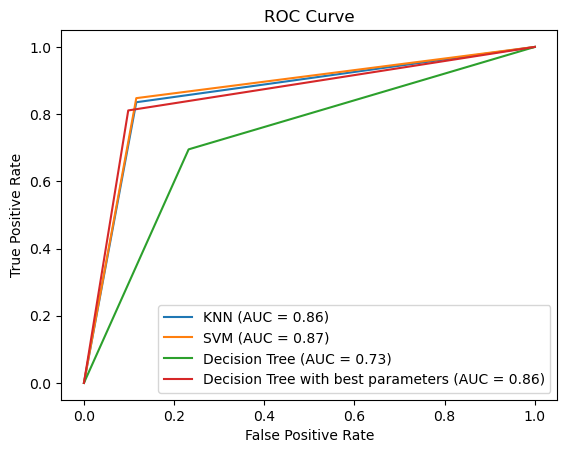

In [218]:
# plot the ROC curve for each model
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(dt_fpr, dtc_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(dt_bestparam_fpr, dt_bestparam_tpr, label=f'Decision Tree with best parameters (AUC = {dt_bestparam_auc:.2f})')

# add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# show the plot
plt.show()


ROC curve gives the graphical representation of all classification treshhold for the classification model.where SVM have highest AUC and Decision tree have lowest value.

## e) Explain which is the best model according to each criterion from 4.c) and 4.d).

#Based on Precision, Recall, accuracy and F1-Score:
Accuracy: Total number of correct prediction by the model is call accuracy
Precision: To chack the propotion of positive identification is actually correct or not
Recall:To check the proption of actual positive identified correctly or not
F1-Score: It is the combination of precision and recall score to evaluate the model  
The highest accuracy and F1- Score achieved by KNN and SVM both model and last by decision tree. So, based on that KNN and SVM is the best fit for the forecasting.
On top of that SVM having more accuracy rather that KNN as it has difference of 0.003 so, according to performed criteria SVM is the best model for further prediction.
Additionally, from the ROC curve AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values so, SVM have 0.87, second highest KNN have 0.86 and Decision tree have 0.73 which means SVM is the most efficiant model.